<a href="https://colab.research.google.com/github/Jainish5658/CNNs_CIFAR_Dataset/blob/main/CNN_cifar10_project_basic_HPtuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#importing the neccessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [13]:
#Loading and pre-processing of the Cifar 10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [14]:
#normalizing pixel values to be between 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0

In [15]:
#Defining class names for cifar 10 dataset
class_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


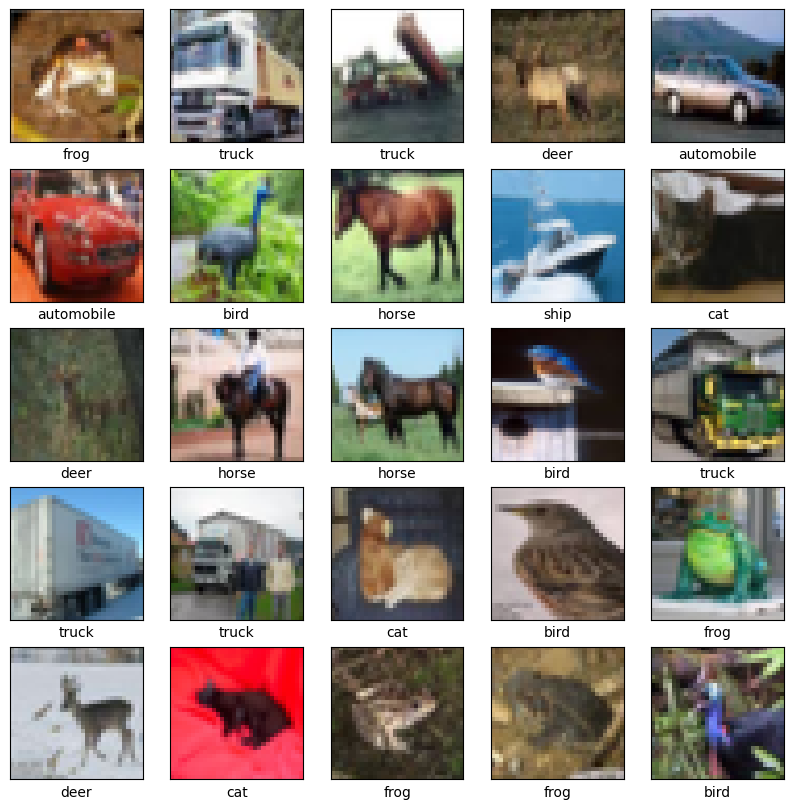

In [16]:
#visualizing few images from the dataset
plt.figure(figsize = (10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_name[train_labels[i][0]])
plt.show()



In [18]:
#building  the CNN Model (customized model)
model  = models.Sequential([
    layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10)
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
#printing the model summary
model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
#compiling the CNN model
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])



In [23]:
#training the CNN model
history = model.fit(train_images, train_labels, epochs = 10, validation_data = (test_images, test_labels))




Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.7005 - loss: 0.8523 - val_accuracy: 0.6769 - val_loss: 0.9319
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 47ms/step - accuracy: 0.7305 - loss: 0.7724 - val_accuracy: 0.7020 - val_loss: 0.8569
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 45ms/step - accuracy: 0.7485 - loss: 0.7217 - val_accuracy: 0.7009 - val_loss: 0.8692
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 46ms/step - accuracy: 0.7605 - loss: 0.6790 - val_accuracy: 0.7119 - val_loss: 0.8594
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 46ms/step - accuracy: 0.7768 - loss: 0.6425 - val_accuracy: 0.7145 - val_loss: 0.8541
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 46ms/step - accuracy: 0.7902 - loss: 0.5987 - val_accuracy: 0.7261 - val_loss: 0.8128
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.8012 - loss: 0.5621 - val_accuracy: 0.7149 - val_loss: 0.8666
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 46ms/step - accuracy: 0.8142 -

In [24]:
#evaluation of the performance of the CNN model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print(f'Test accuracy: {test_acc}')



313/313 - 6s - 18ms/step - accuracy: 0.7201 - loss: 0.9210
Test accuracy: 0.7200999855995178


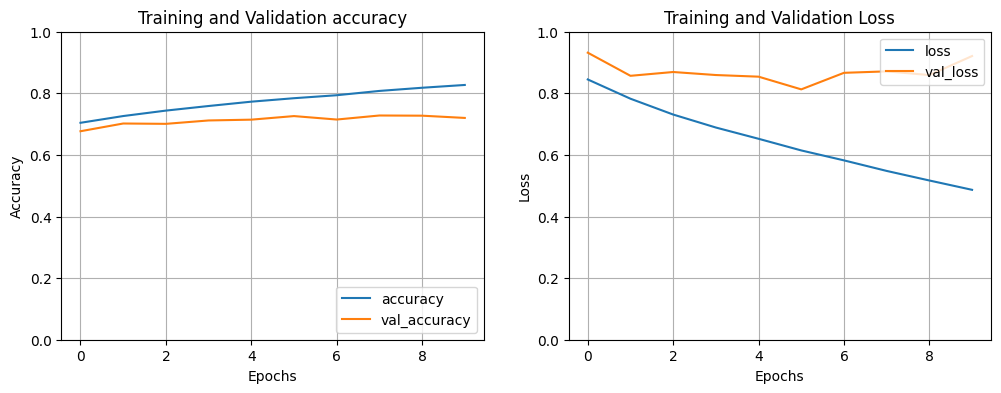

In [25]:
# plotting the vlaidation and training accuracy and loss values.

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc = 'lower right')
plt.title('Training and Validation accuracy')
plt.grid()



plt.subplot(1,2,2)
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0,1])
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')
plt.grid()




plt.show()